In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

try:
    from sklearn.metrics import calinski_harabasz_score
except ImportError:
    from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

FILE   = "IRIS.csv"

df = pd.read_csv( FILE, encoding="ISO-8859-1" )
TARGET = "Species"
#print( df.head() )

X = df.copy()
X = X.drop( [TARGET], axis=1 )
#X = X.drop( ["SepalWidth"], axis=1 )

In [2]:
varNames = X.columns

#print( X.head() )
#print( X.describe() )
#print( "\n\n")

##
##### TRANSFROM
##
theScaler = MinMaxScaler()
##theScaler = StandardScaler()
theScaler.fit( X )

X_TRN = theScaler.transform( X )
X_TRN = pd.DataFrame( X_TRN )
#print( X_TRN.head() )
#print( "\n\n")


varNames_trn = []
for i in varNames :
    newName = "trn_" + i
    varNames_trn.append( newName )
#print( varNames_trn )
#print( "\n\n")

X_TRN.columns = varNames_trn
#print( X_TRN.head() )
#print( "\n\n")

#print( X_TRN.describe() )
#print( "\n\n")

In [4]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

#change the random state # i.e the starting point and run a couple times to see if the clusters 
#are consistent/make sesnse
for K in range(3,12) :
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( X_TRN )
    #Y = km.predict( X_TRN )
    K_LIST.append( K )
    I_LIST.append( km.inertia_ )
    S_LIST.append( silhouette_score(X_TRN,km.labels_) )
    C_LIST.append( calinski_harabasz_score(X_TRN,km.labels_) )

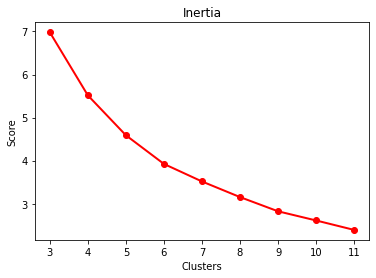

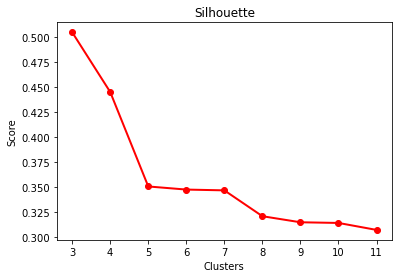

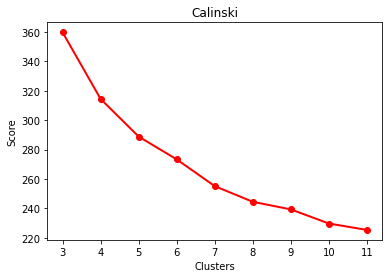





K =  5
   SepalLength  SepalWidth  PetalLength  PetalWidth Species  CLUSTER
0          5.1         3.5          1.4         0.2  setosa        3
1          4.9         3.0          1.4         0.2  setosa        1
2          4.7         3.2          1.3         0.2  setosa        1
3          4.6         3.1          1.5         0.2  setosa        1
4          5.0         3.6          1.4         0.2  setosa        3
         SepalLength  SepalWidth  PetalLength  PetalWidth
CLUSTER                                                  
0           6.996296    3.144444     5.892593    2.181481
1           4.709524    3.100000     1.433333    0.200000
2           5.600000    2.590323     4.041935    1.238710
3           5.220690    3.665517     1.482759    0.279310
4           6.278571    2.904762     4.909524    1.673810




CLUSTER  Species   
0        virginica     27
1        setosa        21
2        versicolor    29
         virginica      2
3        setosa        29
4        versic

In [5]:
def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()


drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )

def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )


#clusterData( df, X_TRN, 3, TARGET )
#clusterData( df, X_TRN, 4, TARGET )
clusterData( df, X_TRN, 5, TARGET )